    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

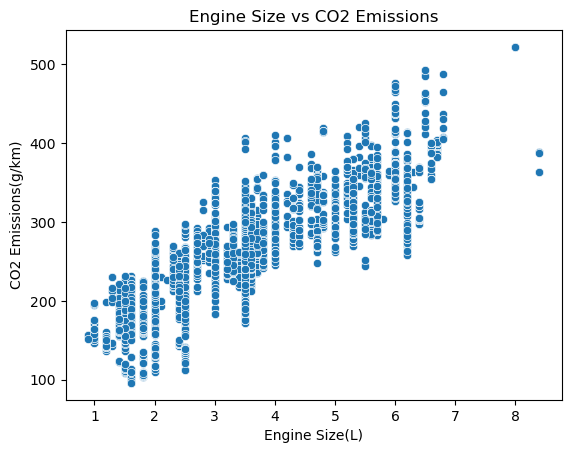

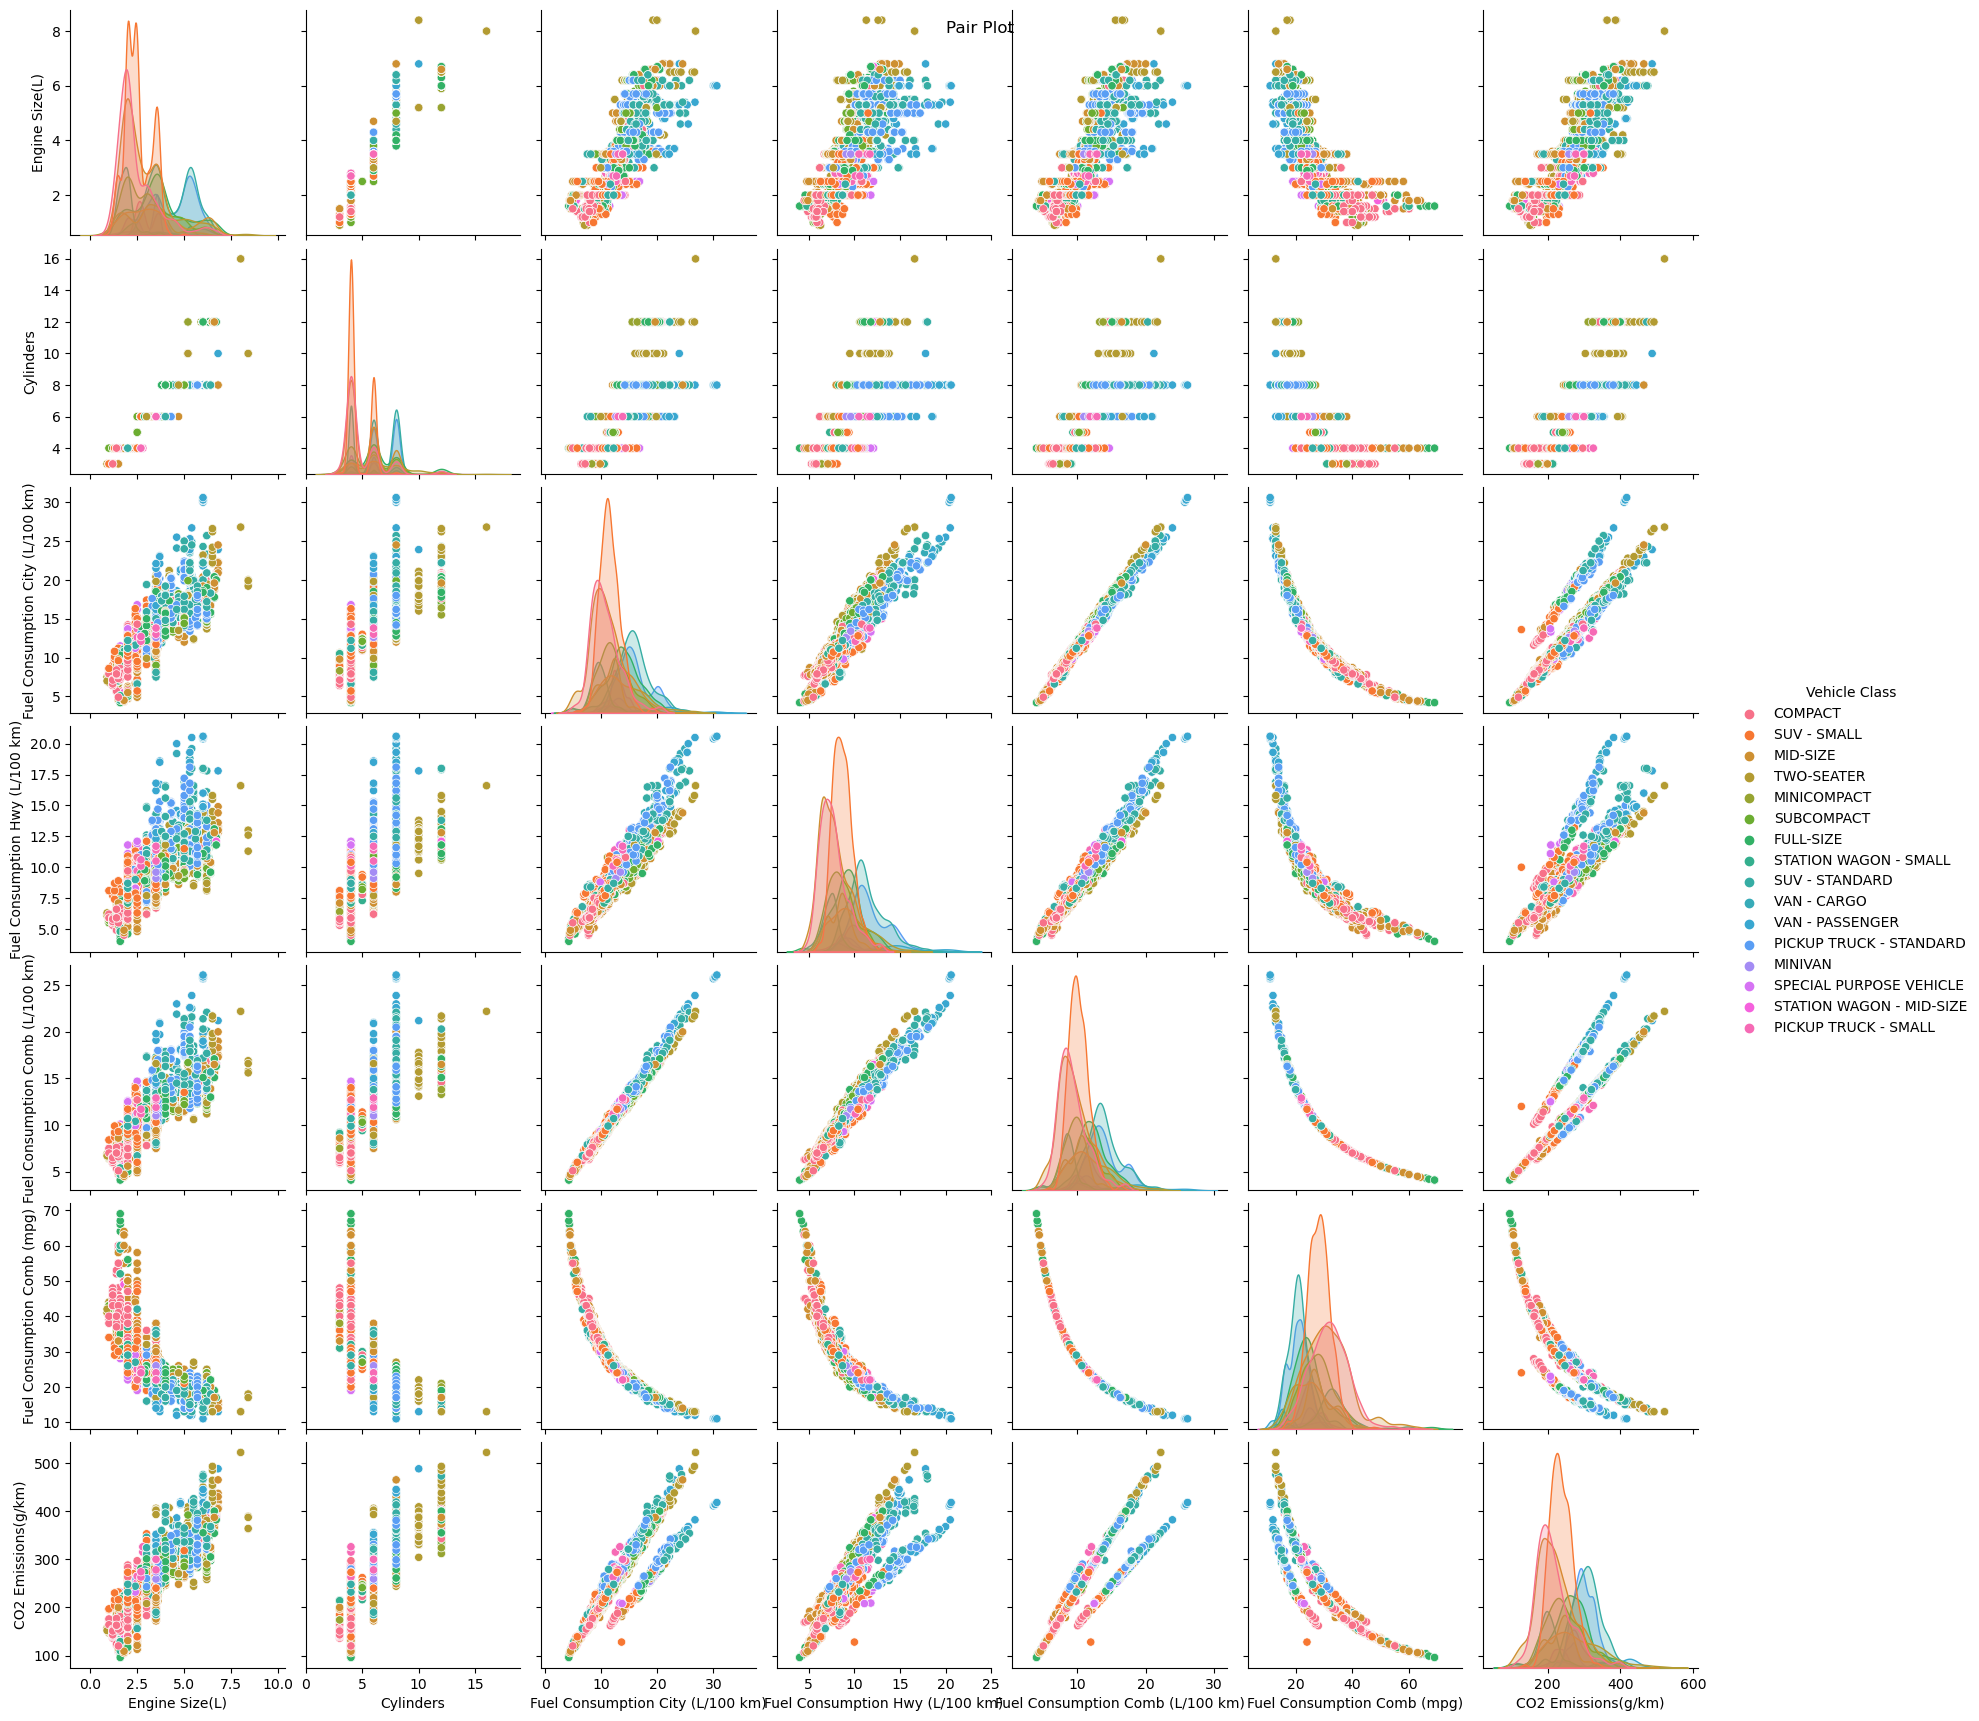

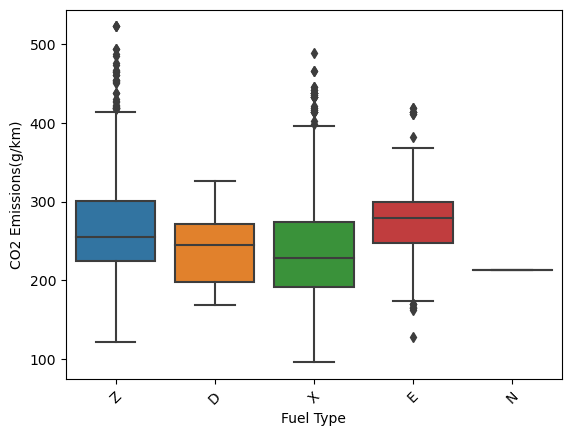

/tmp/ipykernel_13524/3367228012.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


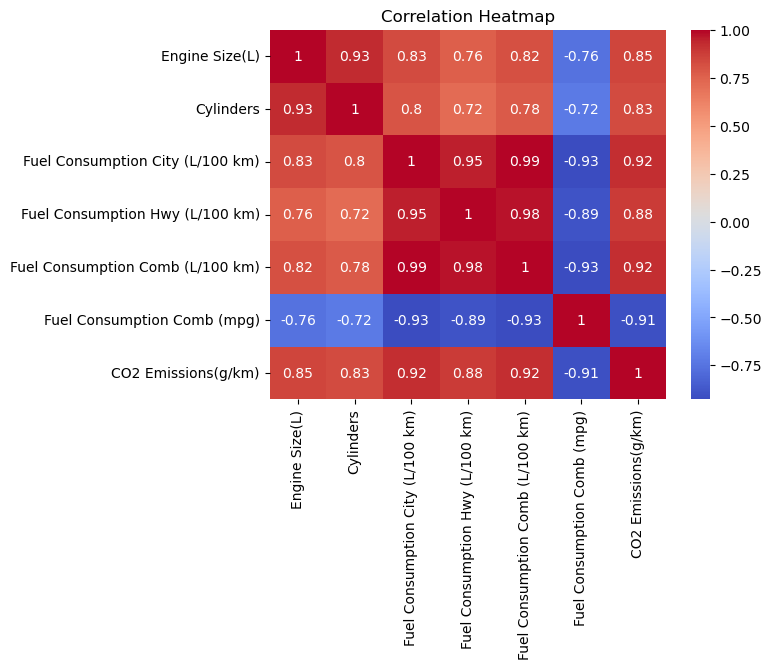

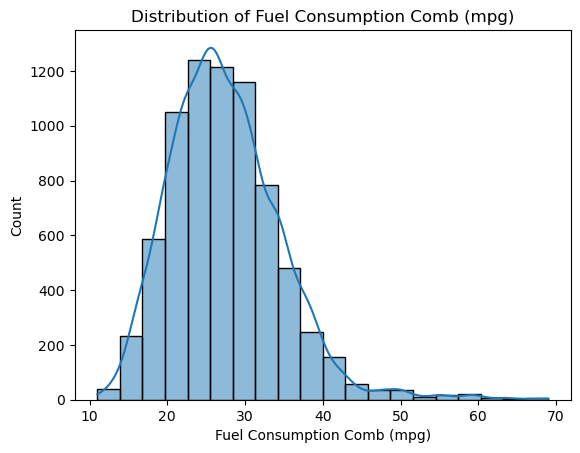

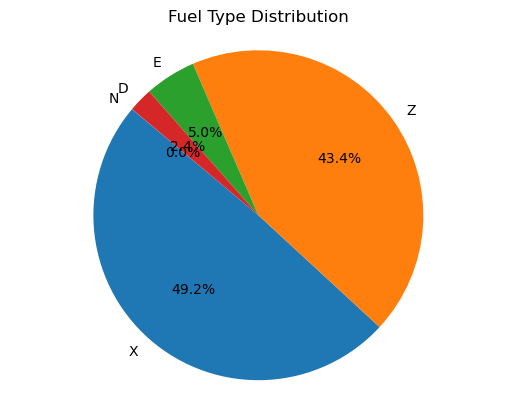

In [18]:
#(a)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.manifold import TSNE

# Load the dataset from the CSV file
data = pd.read_csv('CO2 Emissions.csv')

# Display the first few rows of the dataset
print(data.head())

sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=data)
plt.title('Engine Size vs CO2 Emissions')
plt.show()
#, vars=['Transmission','Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']
sns.pairplot(data, hue="Vehicle Class")
plt.suptitle('Pair Plot')
plt.show()
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=45)
plt.show()

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.histplot(data['Fuel Consumption Comb (mpg)'], bins=20, kde=True)
plt.title('Distribution of Fuel Consumption Comb (mpg)')
plt.show()

fuel_type_counts = data['Fuel Type'].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal')
plt.show()

/home/akash/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/akash/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


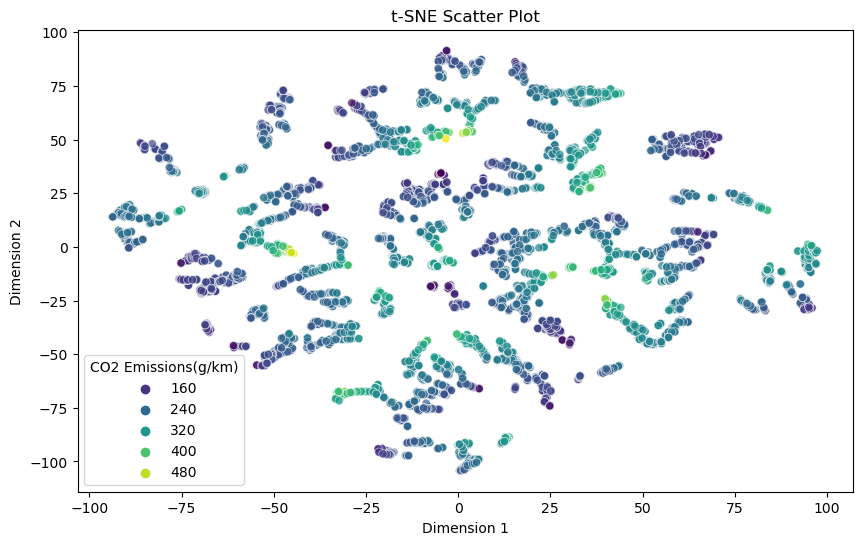

In [7]:
#(b)
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

df = pd.DataFrame(data)

# Initialize a LabelEncoder for each column you want to encode
label_encoders = {}

# Columns to be encoded
columns_to_encode = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# Prepare the data for t-SNE
X = data

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the data
tsne_result = tsne.fit_transform(X)

# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Add the target variable back to the DataFrame
tsne_df['CO2 Emissions(g/km)'] = data['CO2 Emissions(g/km)']

# Plot the t-SNE results as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='CO2 Emissions(g/km)', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE Scatter Plot')
plt.show()


In [20]:
#(c)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

# Drop rows with missing values in specific columns
columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

# Encode categorical columns
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into train and test sets
X = data.drop(['CO2 Emissions(g/km)'], axis=1)
y = data['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")
print(f"Train Adjusted R2 Score: {adjusted_r2_train}")
print(f"Test Adjusted R2 Score: {adjusted_r2_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")


Train MSE: 285.9853836055968
Test MSE: 295.30466951241624
Train RMSE: 16.911102377006557
Test RMSE: 17.18443102091007
Train R2 Score: 0.9163430991931094
Test R2 Score: 0.9141463205390631
Train Adjusted R2 Score: 0.9161870228856339
Test Adjusted R2 Score: 0.9139861457639494
Train MAE: 10.971129887345157
Test MAE: 11.17663002420695


In [26]:
#(d)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

# Drop rows with missing values in specific columns
columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

# Encode categorical columns
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into train and test sets
X = data.drop(['CO2 Emissions(g/km)'], axis=1)
y = data['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Vary the number of components
components_to_try = [4, 6, 8, 10]

for n_components in components_to_try:
    # Perform PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train a linear regression model
    regressor = LinearRegression()
    regressor.fit(X_train_pca, y_train)
    
    # Make predictions
    y_train_pred = regressor.predict(X_train_pca)
    y_test_pred = regressor.predict(X_test_pca)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    rmse_train = sqrt(mse_train)
    rmse_test = sqrt(mse_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    n = X_train_pca.shape[0]
    p = X_train_pca.shape[1]
    adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
    adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Print results for each number of components
    print(f"Number of Components: {n_components}")
    print(f"Train MSE: {mse_train}")
    print(f"Test MSE: {mse_test}")
    print(f"Train RMSE: {rmse_train}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Train R2 Score: {r2_train}")
    print(f"Test R2 Score: {r2_test}")
    print(f"Train Adjusted R2 Score: {adjusted_r2_train}")
    print(f"Test Adjusted R2 Score: {adjusted_r2_test}")
    print(f"Train MAE: {mae_train}")
    print(f"Test MAE: {mae_test}")
    print("\n")


Number of Components: 4
Train MSE: 303.4559546146532
Test MSE: 313.064422797522
Train RMSE: 17.419987216259752
Test RMSE: 17.693626615183277
Train R2 Score: 0.9112325798808358
Test R2 Score: 0.9089830423275728
Train Adjusted R2 Score: 0.9111724291641703
Test Adjusted R2 Score: 0.9089213672757873
Train MAE: 11.722022714084135
Test MAE: 11.965185384189502


Number of Components: 6
Train MSE: 300.1203446854911
Test MSE: 306.3858495184792
Train RMSE: 17.323981779183764
Test RMSE: 17.503880984469678
Train R2 Score: 0.9122083178205035
Test R2 Score: 0.9109246983484615
Train Adjusted R2 Score: 0.912119053273295
Test Adjusted R2 Score: 0.9108341286467314
Train MAE: 11.72850858131008
Test MAE: 11.878453089957913


Number of Components: 8
Train MSE: 287.1135412586759
Test MSE: 297.34925313090844
Train RMSE: 16.944425079024544
Test RMSE: 17.243817823524708
Train R2 Score: 0.9160130887160414
Test R2 Score: 0.9135519004545349
Train Adjusted R2 Score: 0.9158991888533067
Test Adjusted R2 Score: 0.913

In [22]:
#(e)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from math import sqrt

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

# Drop rows with missing values in specific columns
columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

# Extract the categorical columns
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
X_categorical = data[categorical_columns]

# Drop the categorical columns from the original DataFrame
data.drop(columns=categorical_columns, inplace=True)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
X_encoded = encoder.fit_transform(X_categorical)

# Create a DataFrame from the encoded values with column names
encoded_columns = encoder.get_feature_names(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Concatenate the original DataFrame (excluding categorical columns) and the encoded DataFrame
data_encoded = pd.concat([data, X_encoded_df], axis=1)
print(data_encoded.shape)
# Split the data into features (X) and target (y)
X = data_encoded.drop(['CO2 Emissions(g/km)'], axis=1)
y = data_encoded['CO2 Emissions(g/km)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")
print(f"Train Adjusted R2 Score: {adjusted_r2_train}")
print(f"Test Adjusted R2 Score: {adjusted_r2_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")


/home/akash/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(7385, 2145)
Train MSE: 8.634243031859752
Test MSE: 2.534414743769597e+26
Train RMSE: 2.938408247990696
Test RMSE: 15919845300032.273
Train R2 Score: 0.9974742974492186
Test R2 Score: -7.3682827769683796e+22
Train Adjusted R2 Score: 0.9960352577816992
Test Adjusted R2 Score: -1.1566422100332772e+23
Train MAE: 1.9348854540268192
Test MAE: 2917398566123.729


In [27]:
#(f)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from math import sqrt

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

# Drop rows with missing values in specific columns
columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

# Extract the categorical columns
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
X_categorical = data[categorical_columns]

# Drop the categorical columns from the original DataFrame
data.drop(columns=categorical_columns, inplace=True)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
X_encoded = encoder.fit_transform(X_categorical)

# Create a DataFrame from the encoded values with column names
encoded_columns = encoder.get_feature_names(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Concatenate the original DataFrame (excluding categorical columns) and the encoded DataFrame
data_encoded = pd.concat([data, X_encoded_df], axis=1)

# Split the data into features (X) and target (y)
X = data_encoded.drop(['CO2 Emissions(g/km)'], axis=1)
y = data_encoded['CO2 Emissions(g/km)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Perform PCA with different numbers of components (e.g., 5, 10, 15, 20, 25)
num_components_list = [5, 10, 15, 20, 25]
results = []

for num_components in num_components_list:
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Perform linear regression on the PCA-transformed data
    regressor = LinearRegression()
    regressor.fit(X_train_pca, y_train)
    
    # Make predictions
    y_train_pred = regressor.predict(X_train_pca)
    y_test_pred = regressor.predict(X_test_pca)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    rmse_train = sqrt(mse_train)
    rmse_test = sqrt(mse_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    n = X_train_pca.shape[0]
    p = X_train_pca.shape[1]
    adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
    adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Num Components': num_components,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train R2 Score': r2_train,
        'Test R2 Score': r2_test,
        'Train Adjusted R2 Score': adjusted_r2_train,
        'Test Adjusted R2 Score': adjusted_r2_test,
        'Train MAE': mae_train,
        'Test MAE': mae_test
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


/home/akash/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   Num Components   Train MSE    Test MSE  Train RMSE  Test RMSE  \
0               5  514.000446  538.615923   22.671578  23.208100   
1              10  465.766274  480.839380   21.581619  21.928050   
2              15  413.007743  433.462886   20.322592  20.819772   
3              20  382.671074  411.508088   19.561980  20.285662   
4              25  379.391077  404.166927   19.477964  20.103903   

   Train R2 Score  Test R2 Score  Train Adjusted R2 Score  \
0        0.849644       0.843409                 0.849516   
1        0.863753       0.860206                 0.863522   
2        0.879186       0.873980                 0.878879   
3        0.888060       0.880363                 0.887680   
4        0.889020       0.882497                 0.888548   

   Test Adjusted R2 Score  Train MAE   Test MAE  
0                0.843276  15.852366  16.298178  
1                0.859969  14.799502  15.015568  
2                0.873659  14.016162  14.292725  
3                0.87995

In [28]:
#(g)
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

# Drop rows with missing values in specific columns
columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

# Encode categorical columns
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into train and test sets
X = data.drop(['CO2 Emissions(g/km)'], axis=1)
y = data['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize Linear Regression, Lasso, and Ridge models
linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=1.0)  # L1 Regularization
ridge_reg = Ridge(alpha=1.0)  # L2 Regularization

# Fit models to the training data
linear_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_linear_reg_pred = linear_reg.predict(X_test)
y_lasso_reg_pred = lasso_reg.predict(X_test)
y_ridge_reg_pred = ridge_reg.predict(X_test)

# Calculate metrics for Linear Regression
mse_linear_reg = mean_squared_error(y_test, y_linear_reg_pred)
rmse_linear_reg = sqrt(mse_linear_reg)
r2_linear_reg = r2_score(y_test, y_linear_reg_pred)
n_linear_reg = X_train.shape[0]
p_linear_reg = X_train.shape[1]
adjusted_r2_linear_reg = 1 - ((1 - r2_linear_reg) * (n_linear_reg - 1) / (n_linear_reg - p_linear_reg - 1))
mae_linear_reg = mean_absolute_error(y_test, y_linear_reg_pred)

# Calculate metrics for Lasso Regression
mse_lasso_reg = mean_squared_error(y_test, y_lasso_reg_pred)
rmse_lasso_reg = sqrt(mse_lasso_reg)
r2_lasso_reg = r2_score(y_test, y_lasso_reg_pred)
n_lasso_reg = X_train.shape[0]
p_lasso_reg = X_train.shape[1]
adjusted_r2_lasso_reg = 1 - ((1 - r2_lasso_reg) * (n_lasso_reg - 1) / (n_lasso_reg - p_lasso_reg - 1))
mae_lasso_reg = mean_absolute_error(y_test, y_lasso_reg_pred)

# Calculate metrics for Ridge Regression
mse_ridge_reg = mean_squared_error(y_test, y_ridge_reg_pred)
rmse_ridge_reg = sqrt(mse_ridge_reg)
r2_ridge_reg = r2_score(y_test, y_ridge_reg_pred)
n_ridge_reg = X_train.shape[0]
p_ridge_reg = X_train.shape[1]
adjusted_r2_ridge_reg = 1 - ((1 - r2_ridge_reg) * (n_ridge_reg - 1) / (n_ridge_reg - p_ridge_reg - 1))
mae_ridge_reg = mean_absolute_error(y_test, y_ridge_reg_pred)

# Print the results
print("Linear Regression:")
print(f"MSE: {mse_linear_reg}")
print(f"RMSE: {rmse_linear_reg}")
print(f"R2 Score: {r2_linear_reg}")
print(f"Adjusted R2 Score: {adjusted_r2_linear_reg}")
print(f"MAE: {mae_linear_reg}")
print("\nLasso Regression:")
print(f"MSE: {mse_lasso_reg}")
print(f"RMSE: {rmse_lasso_reg}")
print(f"R2 Score: {r2_lasso_reg}")
print(f"Adjusted R2 Score: {adjusted_r2_lasso_reg}")
print(f"MAE: {mae_lasso_reg}")
print("\nRidge Regression:")
print(f"MSE: {mse_ridge_reg}")
print(f"RMSE: {rmse_ridge_reg}")
print(f"R2 Score: {r2_ridge_reg}")
print(f"Adjusted R2 Score: {adjusted_r2_ridge_reg}")
print(f"MAE: {mae_ridge_reg}")


Linear Regression:
MSE: 295.30466951241624
RMSE: 17.18443102091007
R2 Score: 0.9141463205390631
Adjusted R2 Score: 0.9139861457639494
MAE: 11.17663002420695

Lasso Regression:
MSE: 298.90385412136084
RMSE: 17.288836112398105
R2 Score: 0.9130999326094469
Adjusted R2 Score: 0.9129378056180466
MAE: 11.262986730989738

Ridge Regression:
MSE: 295.3554571783758
RMSE: 17.18590868061319
R2 Score: 0.914131555083437
Adjusted R2 Score: 0.9139713527608315
MAE: 11.177797141308643


In [4]:
#(h)
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Load the data into a Pandas DataFrame
data = pd.read_csv('CO2 Emissions.csv')

# Drop rows with missing values in specific columns
columns_to_check = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data.dropna(subset=columns_to_check, inplace=True)

# Encode categorical columns
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features (X) and target (y)
X = data.drop(['CO2 Emissions(g/km)'], axis=1)
y = data['CO2 Emissions(g/km)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Perform linear regression using SGDRegressor
regressor = SGDRegressor(max_iter=10000, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))
# Print the results
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)
print(f"Train Adjusted R2 Score: {adjusted_r2_train}")
print(f"Test Adjusted R2 Score: {adjusted_r2_test}")
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)


Train MSE: 286.5833524030331
Test MSE: 296.5163484951347
Train RMSE: 16.928772914864002
Test RMSE: 17.219650068893234
Train R2 Score: 0.9161681804062047
Test R2 Score: 0.9137940501223316
Train Adjusted R2 Score: 0.9160117777577088
Test Adjusted R2 Score: 0.9136332181262912
Train MAE: 11.08228646281294
Test MAE: 11.30118540429089
